In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import ndimage
# from sklearn.decomposition import PCA

import os
%matplotlib inline

# Record of each Type

## Type A

exp_folder = 'D:\\GoogleDrive\\retina\\Exps\\2021\\1130\\SplitData\\'
filenames = os.listdir(exp_folder)
Mean = 10
contrast_list = [0.1,0.2,0.3]
fileIndex = [25,26,30]
cn = 50

## Type E

exp_folder = 'D:\\GoogleDrive\\retina\\Troy\'s data\\20210908\\SplitData\\'
filenames = os.listdir(exp_folder)
Mean = 10
contrast_list = [0.05,0.1,0.15,0.2,0.3]
fileIndex = np.arange(9,14)
cn = 30

In [41]:
# exp_folder = 'D:\\GoogleDrive\\retina\\Troy\'s data\\20210908\\SplitData\\'
# exp_folder = 'D:\\GoogleDrive\\retina\\Chou\'s data\\20210720\\SplitData\\'
exp_folder = 'D:\\GoogleDrive\\retina\\Exps\\2021\\1130\\SplitData\\'
filenames = os.listdir(exp_folder)

In [42]:
fi = 25
channelnumber = 50

# PCA of all (across different contrast) spike triggered

In [43]:
import warnings
warnings.simplefilter('ignore')

dt = 0.01
sampling_rate = 20000

print(filenames[25])
annots = loadmat(exp_folder+filenames[25], squeeze_me = True)

TicTocer = annots['a_data'][1]
startPoint = np.where(TicTocer>38000)[0][0]
endPoint = np.where(TicTocer>38000)[0][-1]
x = annots['a_data'][0, startPoint:endPoint+1]
x = np.convolve(x, np.ones(int(sampling_rate*dt*0.5))/int(sampling_rate*dt*0.5), 'same')
x = x[int(sampling_rate*dt*0.5)::int(sampling_rate*dt)]
x = x.astype(float)
x = (x-np.mean(x))/np.std(x)
T = np.arange(len(x))*dt
XcT = T-T[int(len(T)/2)]

window = [-1,0] # second
timeshift = np.arange(window[0], window[1]+dt, dt)

Spike = annots['Spikes'][channelnumber-1]
Spike = Spike[np.where(Spike>startPoint/sampling_rate)[0][0]:np.where(Spike<endPoint/sampling_rate)[0][-1]]-startPoint/sampling_rate

rstate, _ = np.histogram(Spike, np.append(T, T[-1]+dt))


nXcorr = np.correlate(x, rstate, 'same')/np.correlate(np.ones_like(x), rstate, 'same')
STA = nXcorr[np.arange(np.where(XcT == window[0])[0],np.where(XcT ==  window[1])[0]+1)]

diode_WhiteNoise_mean=10_C=0.1_01-Dec-2021_0.mat


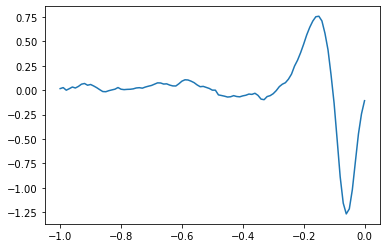

In [44]:
plt.plot(timeshift, STA)

In [45]:
M = 10
C = 0.1

realIrrandiance = x*C*M+M
r = np.convolve(np.hstack((np.zeros(len(STA))+M, realIrrandiance)), STA[::-1], 'full')[len(STA):len(STA)+len(realIrrandiance)]

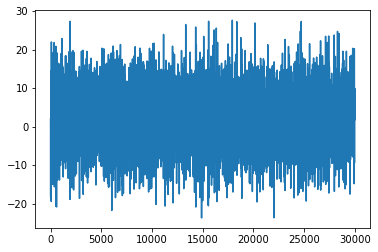

In [46]:
plt.plot(r)

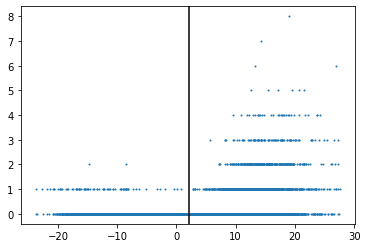

In [53]:
plt.scatter(r, rstate, s = 1)
plt.axvline(np.mean(r), c = 'k')